In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats
import scipy
from scipy import *
from sompy.sompy import SOMFactory
from sompy.visualization.mapview import View2D

C:\Users\tux\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


C:\Users\tux\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: list.remove(x): x not in list

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795


C:\Users\tux\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


0.25
Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Com

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


C:\Users\tux\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


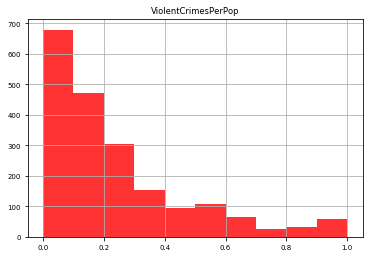

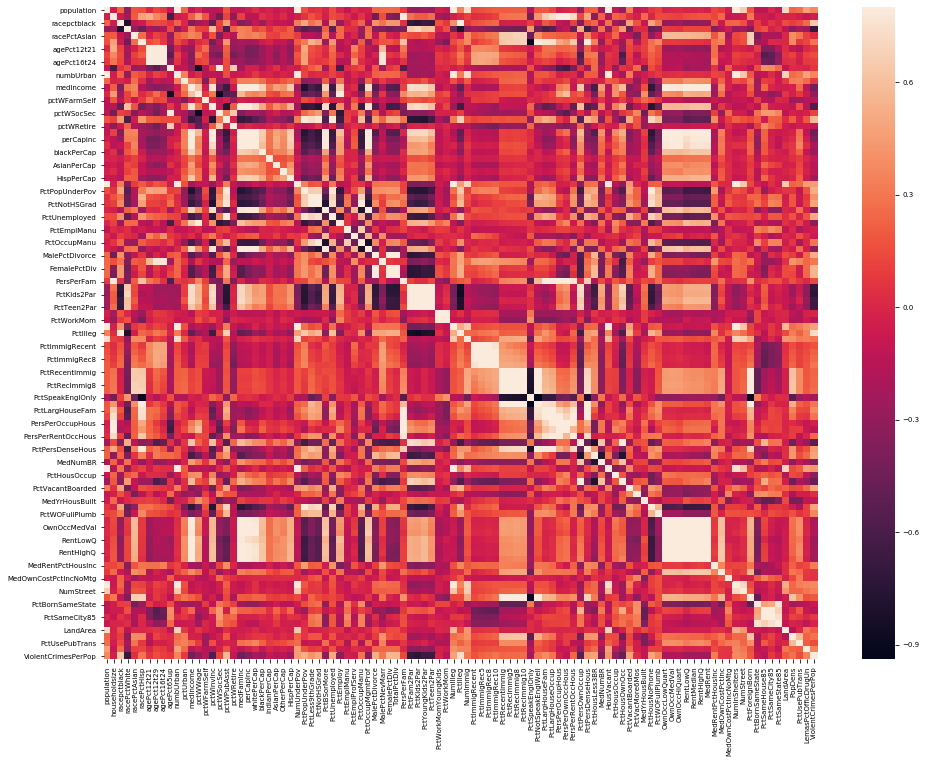

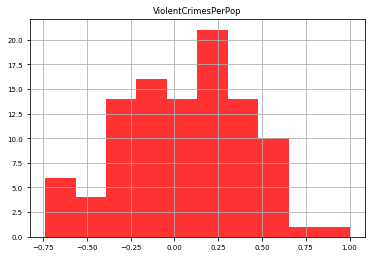

chi2 =  9475.916931283125
p-value =  0.004014065951999552
degree of freedom =  9114
0.22610777628350298


JeanPerso.ipynb:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "import matplotlib.pyplot as plt\n",
JeanPerso.ipynb:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "import scipy\n",
JeanPerso.ipynb:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "from sklearn.preprocessing import StandardScaler\n",
JeanPerso.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

[[ 89   0   5   0]
 [  0 111   0   0]
 [ 10  10  90   0]
 [  0  74  10   0]]
Accuracy0.7268170426065163


NameError: name 'RFECV' is not defined

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


C:\Users\tux\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: list.remove(x): x not in list

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


C:\Users\tux\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')
(1993, 101)
0.15363773206221795
0.25


C:\Users\tux\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


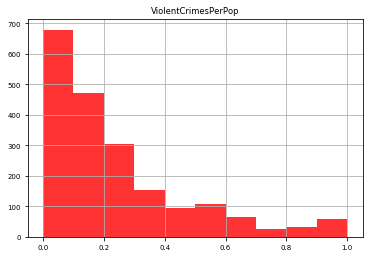

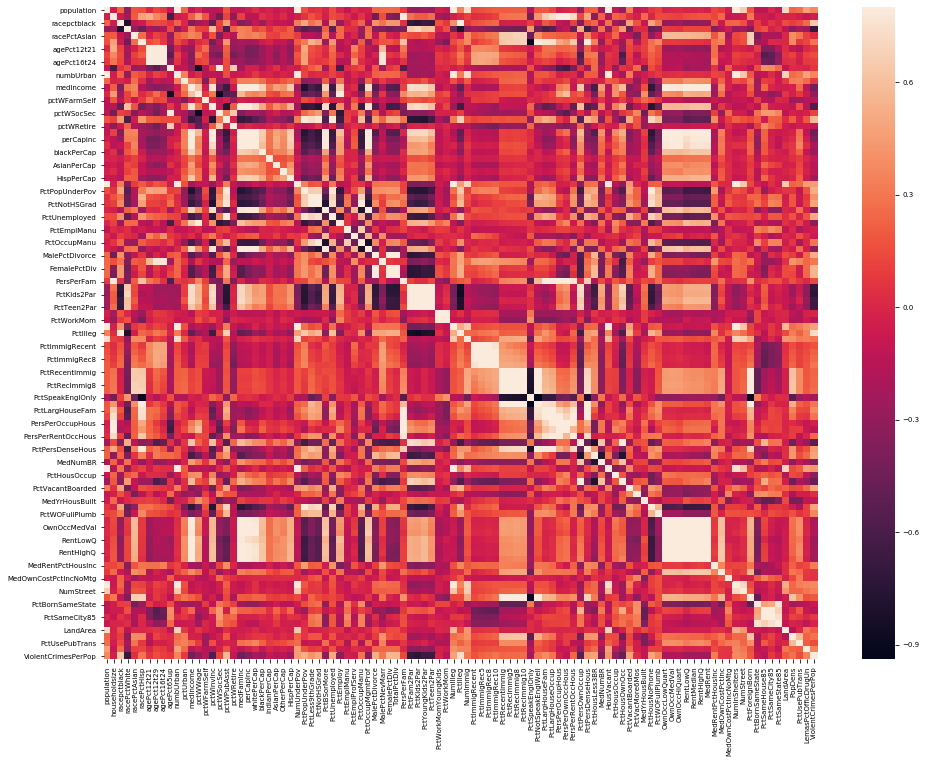

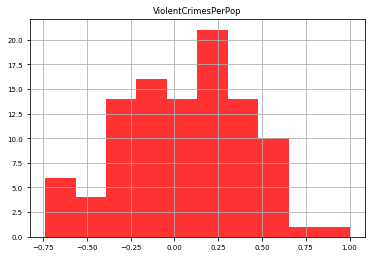

chi2 =  9475.916931283125
p-value =  0.004014065951999552
degree of freedom =  9114
0.22610777628350298


JeanPerso.ipynb:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "import matplotlib.pyplot as plt\n",
JeanPerso.ipynb:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "import scipy\n",
JeanPerso.ipynb:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "from sklearn.preprocessing import StandardScaler\n",
JeanPerso.ipynb:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

[[ 89   0   5   0]
 [  0 111   0   0]
 [ 10  10  90   0]
 [  0  74  10   0]]
Accuracy0.7268170426065163


NameError: name 'RFECV' is not defined

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct65up', 'pctUrban',
       'medIncome', 'pctWFarmSelf', 'pctWInvInc', 'pctWPubAsst', 'pctWRetire',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore',
       'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'MalePctDivorce',
       'MalePctNevMarr', 'PctFam2Par', 'PctWorkMomYoungKids', 'NumImmig',
       'PctImmigRecent', 'PctRecentImmig', 'PctPersOwnOccup', 'PctHousLess3BR',
       'MedNumBR', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos',
       'MedYrHousBuilt', 'PctWOFullPlumb', 'MedRentPctHousInc',
       'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumStreet',
       'PctBornSameState', 'PctSameHouse85', 'PctSameState85', 'LandArea',
       'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn',
       'ViolentCrimesPerPop'],
      dtype='object')
Problem colum

In [54]:
%run Multivariate_data.ipynb
%run Jean.ipynb
%run JeanPerso.ipynb
%run Multivariate_data_2.ipynb

In [3]:
data = pd.read_csv('data_clean.csv')

In [4]:
data.head(5)

,Unnamed: 0,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


In [5]:
data.describe()

,Unnamed: 0,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,996.000000,0.057521,0.463236,0.179649,0.753864,0.153638,0.143708,0.424180,0.493803,0.336232,...,0.215319,0.608946,0.535148,0.626563,0.651515,0.065208,0.232820,0.161741,0.093598,0.237858
std,575.473863,0.126898,0.163604,0.253504,0.244012,0.208921,0.232126,0.155225,0.143572,0.166540,...,0.230958,0.204365,0.181345,0.200476,0.198270,0.109482,0.203137,0.229099,0.239530,0.232980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,498.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000,0.070000
50%,996.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000,0.150000
75%,1494.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.280000,0.780000,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000,0.330000
max,1992.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
pd.crosstab(data['numbUrban'], data['ViolentCrimesPerPop']).head(5)

ViolentCrimesPerPop,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,0.88,0.89,0.9,0.91,0.93,0.94,0.95,0.96,0.97,1.0
numbUrban,,,,,,,,,,,,,,,,,,,,,
0.00,7,12,21,26,24,23,21,22,16,18,...,0,0,1,2,1,0,0,1,0,5
0.01,0,2,4,5,5,3,3,1,1,4,...,0,0,0,0,0,0,0,0,0,0
0.02,2,12,26,33,25,19,23,14,14,14,...,0,0,0,0,0,0,0,0,0,2
0.03,1,6,12,16,11,16,10,8,9,6,...,0,0,0,0,0,0,0,0,0,2
0.04,0,3,1,9,14,6,5,4,7,5,...,0,0,0,0,0,0,0,0,1,3


In [7]:
#Cramer test
chi2 = scipy.stats.chi2_contingency(pd.crosstab(data['racepctblack'], data['ViolentCrimesPerPop']))
chi2 = chi2[0]
N = len(data['numbUrban'])
c = shape(pd.crosstab(data['racepctblack'], data['ViolentCrimesPerPop']))[0]
r = shape(pd.crosstab(data['racepctblack'], data['ViolentCrimesPerPop']))[1]
Min = min((c-1), (r-1))

V = np.sqrt(chi2/(N*Min))
print(V)

0.3137677440159305


In [8]:
data['ViolentCrimesPerPop'].describe()

count    1993.000000
mean        0.237858
std         0.232980
min         0.000000
25%         0.070000
50%         0.150000
75%         0.330000
max         1.000000
Name: ViolentCrimesPerPop, dtype: float64

In [183]:
data['LemasPctOfficDrugUn'].head()

0    0.32
1       0
2       0
3       0
4       0
Name: LemasPctOfficDrugUn, dtype: object

In [10]:
#Cramer test
chi2 = scipy.stats.chi2_contingency(pd.crosstab(data['population'], data['NumUnderPov']))
chi2 = chi2[0]
N = len(data['population'])
c = shape(pd.crosstab(data['population'], data['NumUnderPov']))[0]
r = shape(pd.crosstab(data['population'], data['NumUnderPov']))[1]
Min = min((c-1), (r-1))

V = np.sqrt(chi2/(N*Min))
print(V)

0.600233482625903


In [11]:
result = 0
for i in range(0, len (data)):
    result = data['population'][i]+result
result

114.64000000000073

In [12]:
n = []
for i in range(0, len(data)):
    newPop = (data['population'][i]/114.64)*100
    n.append(newPop)
    newPop = 0
n

[0.16573621772505234,
 0.0,
 0.0,
 0.034891835310537335,
 0.008722958827634334,
 0.017445917655268667,
 0.008722958827634334,
 0.008722958827634334,
 0.026168876482903003,
 0.008722958827634334,
 0.11339846475924634,
 0.017445917655268667,
 0.026168876482903003,
 0.008722958827634334,
 0.034891835310537335,
 0.026168876482903003,
 0.130844382414515,
 0.008722958827634334,
 0.017445917655268667,
 0.0,
 0.21807397069085835,
 0.8722958827634334,
 0.008722958827634334,
 0.09595254710397766,
 0.017445917655268667,
 0.0,
 0.052337752965806006,
 0.008722958827634334,
 0.008722958827634334,
 0.0,
 0.008722958827634334,
 0.2529658060013957,
 0.034891835310537335,
 0.078506629448709,
 0.026168876482903003,
 0.16573621772505234,
 0.026168876482903003,
 0.008722958827634334,
 0.017445917655268667,
 0.008722958827634334,
 0.008722958827634334,
 0.052337752965806006,
 0.0,
 0.078506629448709,
 0.017445917655268667,
 0.10467550593161201,
 0.026168876482903003,
 0.0,
 0.034891835310537335,
 0.00872295

In [13]:
result = 0
for i in range(0, len (data)):
    result = n[i]+result
result

99.9999999999989

In [14]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pydotplus
import collections
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils

C:\Users\tux\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [15]:
data['TotalPctDiv'].describe()

count    1993.000000
mean        0.494235
std         0.183645
min         0.000000
25%         0.360000
50%         0.500000
75%         0.630000
max         1.000000
Name: TotalPctDiv, dtype: float64

In [16]:
Div = pd.DataFrame(data = training_scores_encoded_div, columns = ['Div'])
Black = pd.DataFrame(data = training_scores_encoded_black, columns = ['Black'])
Illeg = pd.DataFrame(data = training_scores_encoded_illeg, columns = ['Illeg'])
test = pd.concat([Div, Black], axis = 1)


NameError: name 'training_scores_encoded_div' is not defined

In [20]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(racism[['Illeglevel', 'Blacklevel', 'Divlevel']],racism['Crimelevel'])
data_feature_names=['Illeglevel', 'Blacklevel', 'Divlevel']

dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names =data_feature_names,class_names = ["1", "2", "3", "4"],
                              filled=True,rounded =True,precision=0)

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#Image(graph.write_png('./decisiontree.png'))

KeyError: "['Divlevel'] not in index"

In [18]:
Crimelevel = []
for i in data['ViolentCrimesPerPop']:
    if (0 <= i < 0.07) :
        Crimelevel.append(1)
    elif (0.07 <= i < 0.15):
        Crimelevel.append(2)
    elif (0.15 <= i < 0.33) :
        Crimelevel.append(3)
    else :
        Crimelevel.append(4)
crimelevel = pd.DataFrame(data = Crimelevel, columns = ['Crimelevel'])

Illeglevel = []
for i in data['PctIlleg']:
    if (0 <= i < 0.09) :
        Illeglevel.append(1)
    elif (0.09 <= i < 0.17):
        Illeglevel.append(2)
    elif (0.17 <= i < 0.32) :
        Illeglevel.append(3)
    else :
        Illeglevel.append(4)        
illeglevel = pd.DataFrame(data = Illeglevel, columns = ['Illeglevel'])

Blacklevel = []
for i in data['racepctblack']:
    if (0 <= i < 0.02) :
        Blacklevel.append(1)
    elif (0.02 <= i < 0.06):
        Blacklevel.append(2)
    elif (0.06 <= i < 0.23) :
        Blacklevel.append(3)
    else :
        Blacklevel.append(4) 
blacklevel = pd.DataFrame(data = Blacklevel, columns = ['Blacklevel'])

Div = []
for i in data['TotalPctDiv']:
    if (0 <= i < 0.36) :
        Div.append(1)
    elif (0.36 <= i < 0.50):
        Div.append(2)
    elif (0.50 <= i < 0.63) :
        Div.append(3)
    else :
        Div.append(4) 
divlevel = pd.DataFrame(data = Div, columns = ['Divlevel'])

In [19]:
racism = pd.concat([blacklevel, illeglevel, crimelevel], axis = 1)

In [21]:
racism.head()
racism2 = racism.copy()
racism2 = racism2.drop(columns = ['Crimelevel'])

In [58]:
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14,0.2
1,0,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0,NaN,0.67
2,0,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0,NaN,0.43
3,0.04,0.77,1,0.08,0.12,0.1,0.51,0.5,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0,NaN,0.03


In [199]:
X = data_clean.iloc[:,0:100].values
y = data_clean.iloc[:,100].values

#Standardize
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

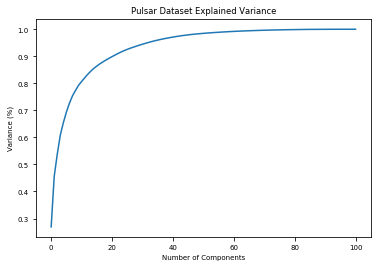

In [200]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_clean)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [201]:
c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))

Amount of variance: [25.24017821 16.39807338  9.10809698  7.75796798  5.51090372  4.21371816
  3.28913847  3.00271588  2.12166785  1.64851746  1.53237946  1.44294239
  1.38648964  1.04393587]
Sum of the variance: 83.7
Percentage of variance: [0.25319968 0.16449911 0.0913689  0.07782492 0.05528325 0.04227039
 0.03299536 0.03012208 0.02128375 0.01653729 0.01537224 0.01447504
 0.01390873 0.01047236]
Sum of the percentage of variance: 0.84


In [202]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import r2_score
seed = 42

In [203]:
n_lambdas = 200
Lambdas = np.logspace(-5, 5, n_lambdas)

ridge = linear_model.Ridge()

coefs = []
errors = []
for l in Lambdas:
    ridge.set_params(alpha=l)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append(metrics.mean_squared_error(ridge.predict(X_test), y_test))
    
    
print('MSE min :', round(min(errors), 4))

MSE min : 0.0179


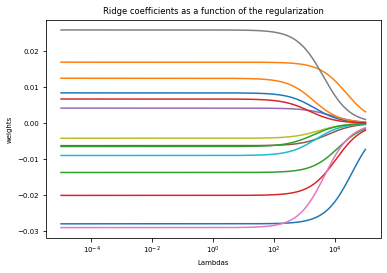

In [204]:
ax = plt.gca()

ax.plot(Lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

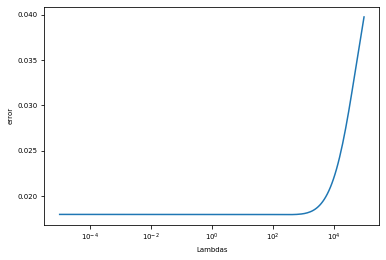

In [205]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('error')
plt.show()

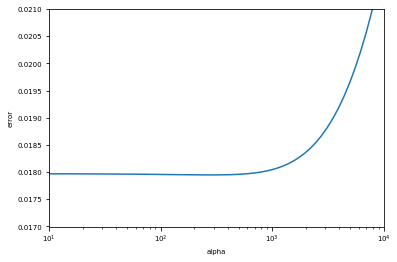

In [207]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.ylim(0.017, 0.021)
plt.xlim(1e1, 1e4)
plt.xlabel('alpha')
plt.ylabel('error')
plt.show()

In [208]:
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

for train_index, test_index in kf.split(X_train):
    print("TRAIN:", "taille", len(train_index), ", 5ers indices", train_index[0:5], 
          "|| TEST:", "taille", len(test_index), ", 5ers indices", test_index[0:5])

TRAIN: taille 1116 , 5ers indices [0 1 2 3 4] || TEST: taille 279 , 5ers indices [23 29 30 31 32]
TRAIN: taille 1116 , 5ers indices [0 1 2 4 6] || TEST: taille 279 , 5ers indices [ 3  5 10 12 39]
TRAIN: taille 1116 , 5ers indices [1 3 4 5 8] || TEST: taille 279 , 5ers indices [0 2 6 7 9]
TRAIN: taille 1116 , 5ers indices [0 1 2 3 5] || TEST: taille 279 , 5ers indices [ 4 11 15 17 18]
TRAIN: taille 1116 , 5ers indices [0 2 3 4 5] || TEST: taille 279 , 5ers indices [ 1  8 13 14 16]


In [209]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha': Lambdas}

# Choisir un score à optimiser, ici la MSE
score = 'neg_mean_squared_error'

# Créer une régression Ridge avec recherche d'hyperparamètre par validation croisée
reg = model_selection.GridSearchCV(linear_model.Ridge(), # régression Ridge
                                    param_grid, # hyperparamètres à tester
                                    cv=kf, # folds pour la validation croisée
                                    scoring=score # score à optimiser
                                    )

# Optimiser la régression sur le jeu d'entraînement
reg.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(reg.cv_results_['mean_test_score'], # score moyen
                                reg.cv_results_['std_test_score'], # écart-type du score
                                reg.cv_results_['params'] # valeur de l'hyperparamètre
                                ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
                                                mean, # score moyen
                                                std * 2, # barre d'erreur
                                                params # hyperparamètre
                                                ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 108.43659686896109}
Résultats de la validation croisée :
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 1e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 1.1226677735108135e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 1.2603829296797274e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 1.414991297434576e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 1.588565129428053e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 1.7834308769319092e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 2.0022003718155845e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 2.2478058335487252e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 2.523539170434766e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 2.833096101839324e-05}
	neg_mean_squared_error = -0.021 (+/-0.003) for {'alpha': 3.180625692794119e-

In [210]:

n_lambdas = 300
Lambdas = np.logspace(-5, 1, n_lambdas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for l in Lambdas:
    lasso.set_params(alpha=l)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(metrics.mean_squared_error(lasso.predict(X_test), y_test))
    
print('MSE min :', round(min(errors), 3))

MSE min : 0.072


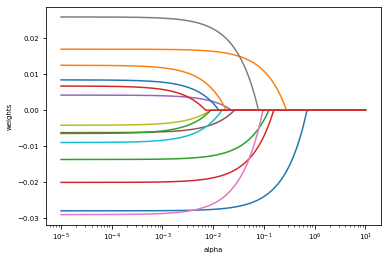

In [211]:
ax = plt.gca()

ax.plot(Lambdas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

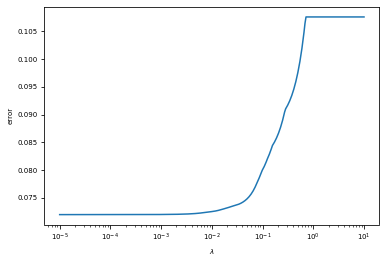

In [212]:
ax = plt.gca()

ax.plot(Lambdas, errors)
ax.set_xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [213]:
min(errors)

0.07195651812554252

In [214]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'alpha': Lambdas}

# Choisir un score à optimiser, ici la MSE
score = 'neg_mean_squared_error'

# Créer une régression Lasso avec recherche d'hyperparamètre par validation croisée
reg = model_selection.GridSearchCV(linear_model.Lasso(fit_intercept=False), # régression Lasso
                                    param_grid, # hyperparamètres à tester
                                    cv=kf, # folds pour la validation croisée
                                    scoring=score # score à optimiser
                                    )

# Optimiser la régression sur le jeu d'entraînement
reg.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(reg.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(reg.cv_results_['mean_test_score'], # score moyen
                                reg.cv_results_['std_test_score'], # écart-type du score
                                reg.cv_results_['params'] # valeur de l'hyperparamètre
                                ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
                                                mean, # score moyen
                                                std * 2, # barre d'erreur
                                                params # hyperparamètre
                                                ))

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'alpha': 1e-05}
Résultats de la validation croisée :
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.0472898382363595e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.096816005273138e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.1486842567375548e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.2030053494233242e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.2598952777950285e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.3194755216767059e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.3818733056536336e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.4472218707411344e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.5156607589006043e-05}
	neg_mean_squared_error = -0.079 (+/-0.005) for {'alpha': 1.5873361110102085e-05}
	neg_

In [103]:
names = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
names2 = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'Crimelevel']
len(names)

14

In [104]:
X_traincp = X_train.copy()
xtraincp = pd.DataFrame(data = X_traincp, columns = names)
Xtrainrace = pd.concat([xtraincp, racism['Crimelevel']], axis = 1)
bordel = Xtrainrace.dropna()

neg_mean_squared_error = -0.052 (+/-0.014) for {'alpha': 0.0038781871456107235}

In [105]:
new = SOMFactory().build(bordel.values, mapsize = (10,10), component_names = names2, neighborhood = 'gaussian', training = 'batch')
new.train(n_job = 1, shared_memory = False, verbose = None)

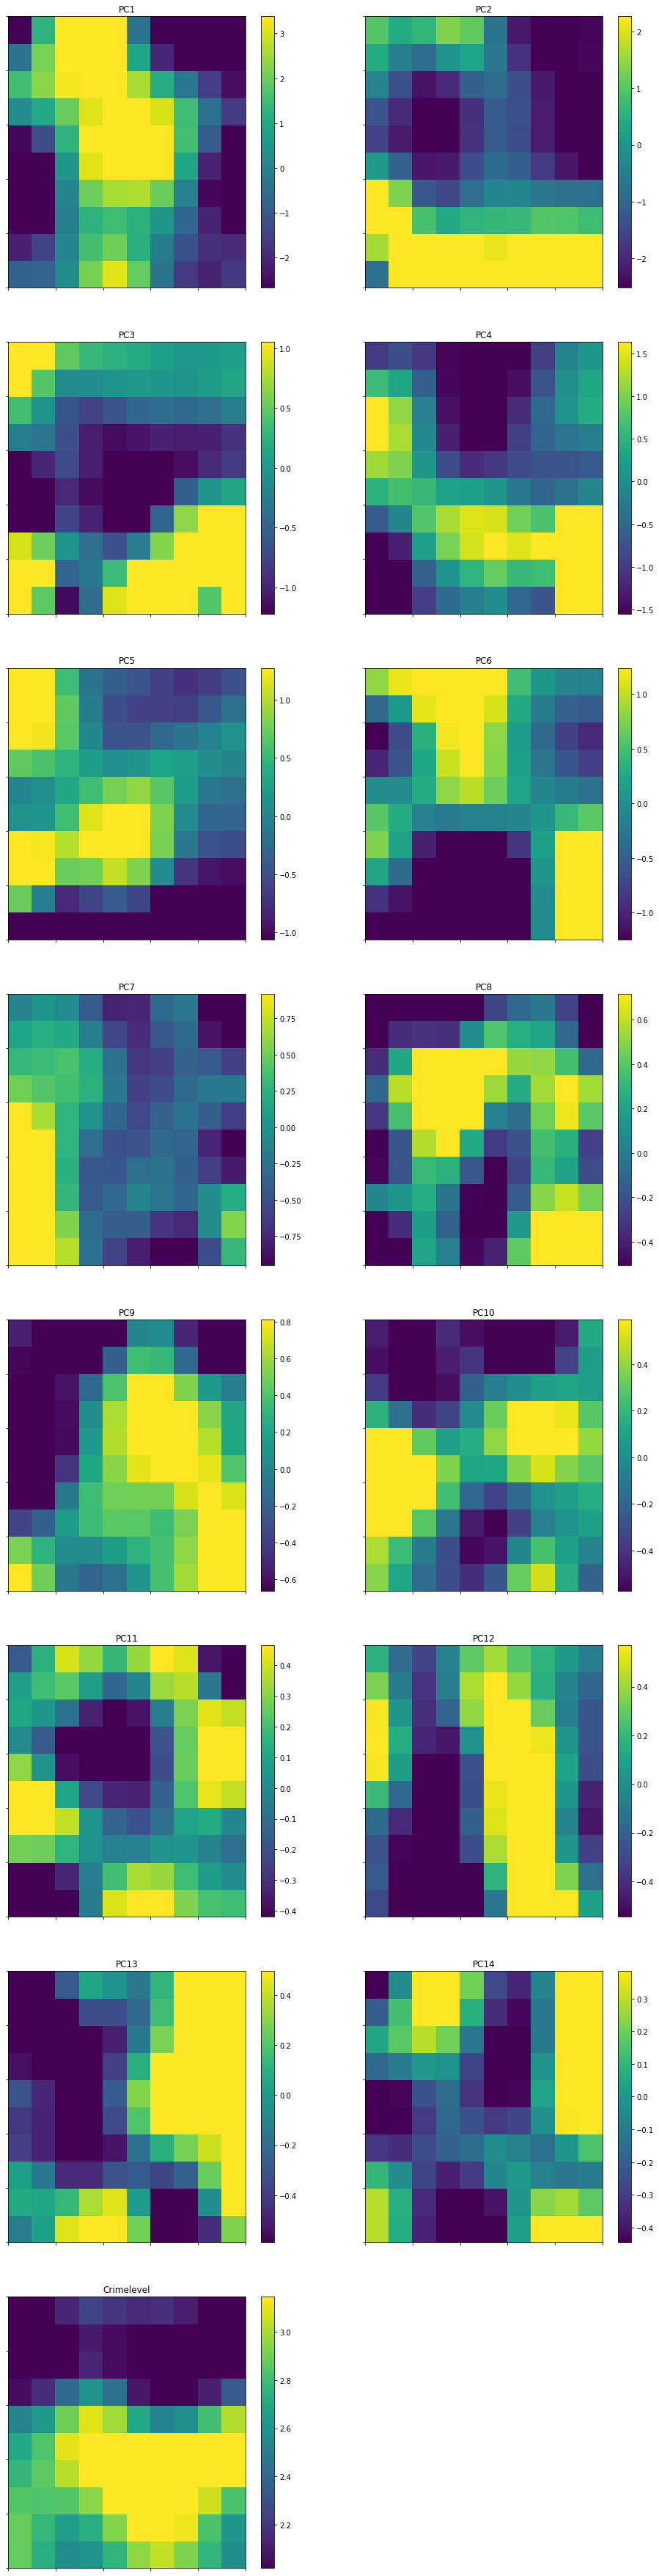

In [106]:
view2D = View2D(10, 10, " ", text_size=10)
view2D.show(new, col_sz=2, which_dim="all", denormalize=True)

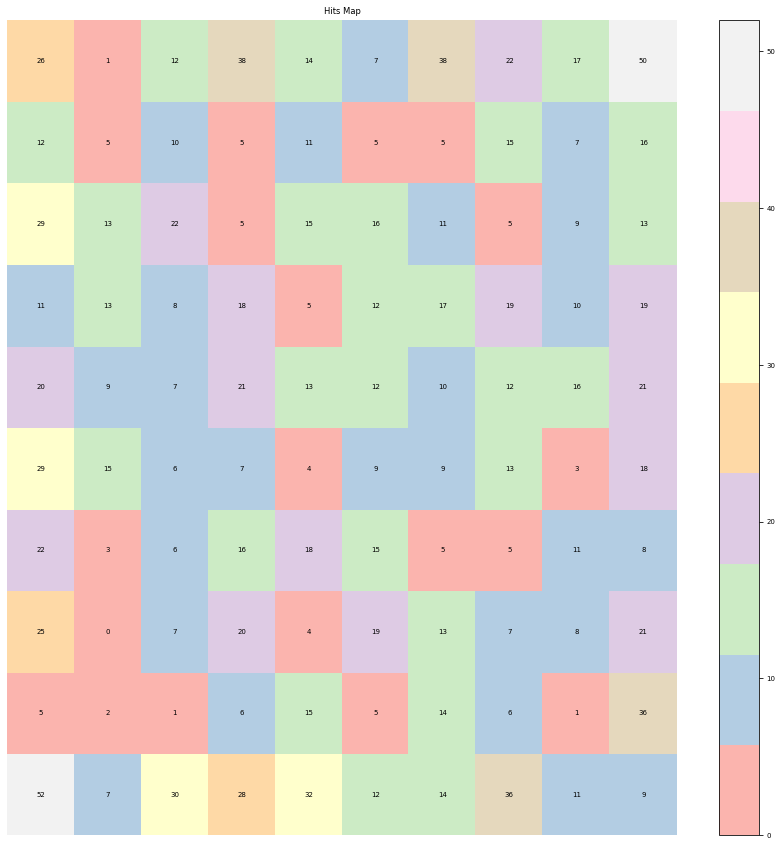

In [225]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(15,15,"Hits Map",text_size=7)
vhts.show(new, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1", logaritmic=False)
plt.show()

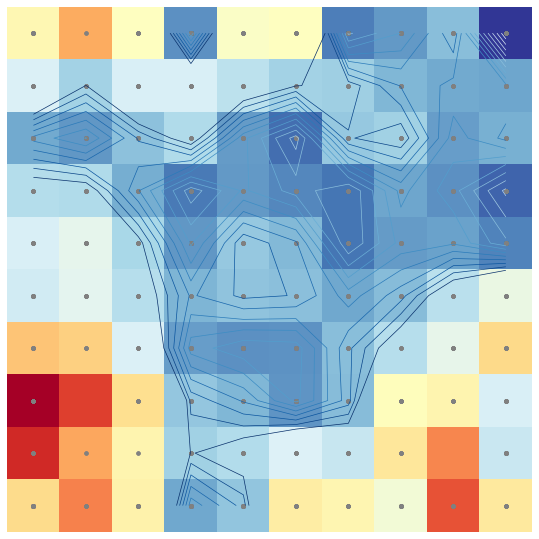

In [226]:
from sompy.visualization.umatrix import UMatrixView

UMts = UMatrixView(20, 20, " ")
UMts.show(new)
plt.show()

In [56]:
data_selected2.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct65up,pctUrban,medIncome,...,MedOwnCostPctIncNoMtg,NumStreet,PctBornSameState,PctSameHouse85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,4,1,1,3,3,4,1,2,2,3,...,1,1,1,2,2,4,3,4,4,3
1,1,1,3,2,4,3,1,1,1,2,...,1,1,2,1,1,1,2,4,4,4
2,1,2,4,1,3,2,2,2,2,2,...,2,2,2,2,1,1,3,1,1,4
3,3,4,4,1,3,3,4,1,1,4,...,3,3,1,4,2,1,4,4,4,2
4,1,4,1,4,3,3,2,2,2,4,...,1,1,3,3,1,2,1,1,1,1


In [ ]:
clf=tree.DecisionTreeClassifier()
clf=clf.fit(data_selected2[['Illeglevel', 'Blacklevel', 'Divlevel']],racism['Crimelevel'])
data_feature_names=['Illeglevel', 'Blacklevel', 'Divlevel']

dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names =data_feature_names,class_names = ["1", "2", "3", "4"],
                              filled=True,rounded =True,precision=0)

graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Benchmarking SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.25,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Benchmarking RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


C:\Users\tux\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Benchmarking SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


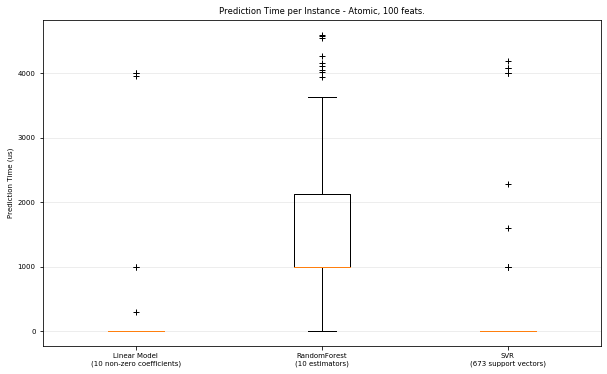

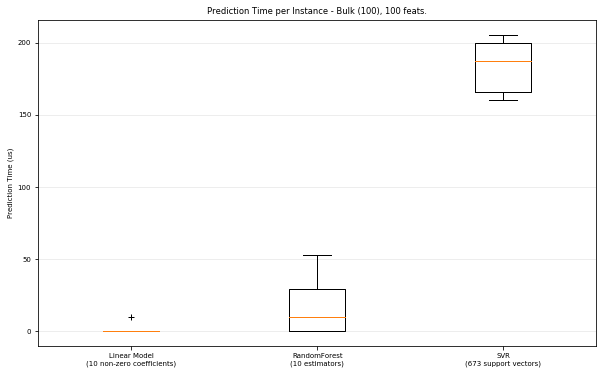

benchmarking with 0 features


ValueError: Found array with 0 feature(s) (shape=(1000, 0)) while a minimum of 1 is required by StandardScaler.

In [120]:
from collections import defaultdict

import time
import gc
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.utils import shuffle


def _not_in_sphinx():
    # Hack to detect whether we are running by the sphinx builder
    return '__file__' in globals()


def atomic_benchmark_estimator(estimator, X_test, verbose=False):
    """Measure runtime prediction of each instance."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_instances, dtype=np.float)
    for i in range(n_instances):
        instance = X_test[[i], :]
        start = time.time()
        estimator.predict(instance)
        runtimes[i] = time.time() - start
    if verbose:
        print("atomic_benchmark runtimes:", min(runtimes), np.percentile(
            runtimes, 50), max(runtimes))
    return runtimes


def bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats, verbose):
    """Measure runtime prediction of the whole input."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_bulk_repeats, dtype=np.float)
    for i in range(n_bulk_repeats):
        start = time.time()
        estimator.predict(X_test)
        runtimes[i] = time.time() - start
    runtimes = np.array(list(map(lambda x: x / float(n_instances), runtimes)))
    if verbose:
        print("bulk_benchmark runtimes:", min(runtimes), np.percentile(
            runtimes, 50), max(runtimes))
    return runtimes


def benchmark_estimator(estimator, X_test, n_bulk_repeats=30, verbose=False):
    """
    Measure runtimes of prediction in both atomic and bulk mode.

    Parameters
    ----------
    estimator : already trained estimator supporting `predict()`
    X_test : test input
    n_bulk_repeats : how many times to repeat when evaluating bulk mode

    Returns
    -------
    atomic_runtimes, bulk_runtimes : a pair of `np.array` which contain the
    runtimes in seconds.

    """
    atomic_runtimes = atomic_benchmark_estimator(estimator, X_test, verbose)
    bulk_runtimes = bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats,
                                             verbose)
    return atomic_runtimes, bulk_runtimes


def generate_dataset(n_train, n_test, n_features, noise=0.1, verbose=False):
    """Generate a regression dataset with the given parameters."""
    if verbose:
        print("generating dataset...")

    X, y, coef = make_regression(n_samples=n_train + n_test,
                                 n_features=n_features, noise=noise, coef=True)

    random_seed = 13
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=n_train, test_size=n_test, random_state=random_seed)
    X_train, y_train = shuffle(X_train, y_train, random_state=random_seed)

    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    y_scaler = StandardScaler()
    y_train = y_scaler.fit_transform(y_train[:, None])[:, 0]
    y_test = y_scaler.transform(y_test[:, None])[:, 0]

    gc.collect()
    if verbose:
        print("ok")
    return X_train, y_train, X_test, y_test


def boxplot_runtimes(runtimes, pred_type, configuration):
    """
    Plot a new `Figure` with boxplots of prediction runtimes.

    Parameters
    ----------
    runtimes : list of `np.array` of latencies in micro-seconds
    cls_names : list of estimator class names that generated the runtimes
    pred_type : 'bulk' or 'atomic'

    """

    fig, ax1 = plt.subplots(figsize=(10, 6))
    bp = plt.boxplot(runtimes, )

    cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
                                  estimator_conf['complexity_computer'](
                                      estimator_conf['instance']),
                                  estimator_conf['complexity_label']) for
                 estimator_conf in configuration['estimators']]
    plt.setp(ax1, xticklabels=cls_infos)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='red', marker='+')

    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)

    ax1.set_axisbelow(True)
    ax1.set_title('Prediction Time per Instance - %s, %d feats.' % (
        pred_type.capitalize(),
        configuration['n_features']))
    ax1.set_ylabel('Prediction Time (us)')

    plt.show()


def benchmark(configuration):
    """Run the whole benchmark."""
    X_train, y_train, X_test, y_test = generate_dataset(
        configuration['n_train'], configuration['n_test'],
        configuration['n_features'])

    stats = {}
    for estimator_conf in configuration['estimators']:
        print("Benchmarking", estimator_conf['instance'])
        estimator_conf['instance'].fit(X_train, y_train)
        gc.collect()
        a, b = benchmark_estimator(estimator_conf['instance'], X_test)
        stats[estimator_conf['name']] = {'atomic': a, 'bulk': b}

    cls_names = [estimator_conf['name'] for estimator_conf in configuration[
        'estimators']]
    runtimes = [1e6 * stats[clf_name]['atomic'] for clf_name in cls_names]
    boxplot_runtimes(runtimes, 'atomic', configuration)
    runtimes = [1e6 * stats[clf_name]['bulk'] for clf_name in cls_names]
    boxplot_runtimes(runtimes, 'bulk (%d)' % configuration['n_test'],
                     configuration)


def n_feature_influence(estimators, n_train, n_test, n_features, percentile):
    """
    Estimate influence of the number of features on prediction time.

    Parameters
    ----------

    estimators : dict of (name (str), estimator) to benchmark
    n_train : nber of training instances (int)
    n_test : nber of testing instances (int)
    n_features : list of feature-space dimensionality to test (int)
    percentile : percentile at which to measure the speed (int [0-100])

    Returns:
    --------

    percentiles : dict(estimator_name,
                       dict(n_features, percentile_perf_in_us))

    """
    percentiles = defaultdict(defaultdict)
    for n in n_features:
        print("benchmarking with %d features" % n)
        X_train, y_train, X_test, y_test = generate_dataset(n_train, n_test, n)
        for cls_name, estimator in estimators.items():
            estimator.fit(X_train, y_train)
            gc.collect()
            runtimes = bulk_benchmark_estimator(estimator, X_test, 30, False)
            percentiles[cls_name][n] = 1e6 * np.percentile(runtimes,
                                                           percentile)
    return percentiles


def plot_n_features_influence(percentiles, percentile):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    for i, cls_name in enumerate(percentiles.keys()):
        x = np.array(sorted([n for n in percentiles[cls_name].keys()]))
        y = np.array([percentiles[cls_name][n] for n in x])
        plt.plot(x, y, color=colors[i], )
    ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax1.set_axisbelow(True)
    ax1.set_title('Evolution of Prediction Time with #Features')
    ax1.set_xlabel('#Features')
    ax1.set_ylabel('Prediction Time at %d%%-ile (us)' % percentile)
    plt.show()


def benchmark_throughputs(configuration, duration_secs=0.1):
    """benchmark throughput for different estimators."""
    X_train, y_train, X_test, y_test = generate_dataset(
        configuration['n_train'], configuration['n_test'],
        configuration['n_features'])
    throughputs = dict()
    for estimator_config in configuration['estimators']:
        estimator_config['instance'].fit(X_train, y_train)
        start_time = time.time()
        n_predictions = 0
        while (time.time() - start_time) < duration_secs:
            estimator_config['instance'].predict(X_test[[0]])
            n_predictions += 1
        throughputs[estimator_config['name']] = n_predictions / duration_secs
    return throughputs


def plot_benchmark_throughput(throughputs, configuration):
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = ['r', 'g', 'b']
    cls_infos = ['%s\n(%d %s)' % (estimator_conf['name'],
                                  estimator_conf['complexity_computer'](
                                      estimator_conf['instance']),
                                  estimator_conf['complexity_label']) for
                 estimator_conf in configuration['estimators']]
    cls_values = [throughputs[estimator_conf['name']] for estimator_conf in
                  configuration['estimators']]
    plt.bar(range(len(throughputs)), cls_values, width=0.5, color=colors)
    ax.set_xticks(np.linspace(0.25, len(throughputs) - 0.75, len(throughputs)))
    ax.set_xticklabels(cls_infos, fontsize=10)
    ymax = max(cls_values) * 1.2
    ax.set_ylim((0, ymax))
    ax.set_ylabel('Throughput (predictions/sec)')
    ax.set_title('Prediction Throughput for different estimators (%d '
                 'features)' % configuration['n_features'])
    plt.show()


# #############################################################################
# Main code

start_time = time.time()

# #############################################################################
# Benchmark bulk/atomic prediction speed for various regressors
configuration = {
    'n_train': int(1e3),
    'n_test': int(1e2),
    'n_features': int(1e2),
    'estimators': [
        {'name': 'Linear Model',
         'instance': SGDRegressor(penalty='elasticnet', alpha=0.01,
                                  l1_ratio=0.25, tol=1e-4),
         'complexity_label': 'non-zero coefficients',
         'complexity_computer': lambda clf: np.count_nonzero(clf.coef_)},
        {'name': 'RandomForest',
         'instance': RandomForestRegressor(),
         'complexity_label': 'estimators',
         'complexity_computer': lambda clf: clf.n_estimators},
        {'name': 'SVR',
         'instance': SVR(kernel='rbf'),
         'complexity_label': 'support vectors',
         'complexity_computer': lambda clf: len(clf.support_vectors_)},
    ]
}
benchmark(configuration)

# benchmark n_features influence on prediction speed
percentile = 90
percentiles = n_feature_influence({'ridge': Ridge()},
                                  configuration['n_train'],
                                  configuration['n_test'],
                                  [0, 44, 101], percentile)
plot_n_features_influence(percentiles, percentile)

# benchmark throughput
throughputs = benchmark_throughputs(configuration)
plot_benchmark_throughput(throughputs, configuration)

stop_time = time.time()
print("example run in %.2fs" % (stop_time - start_time))

In [182]:
v = []
for i in range (len(data_clean.columns)):
    X = data_clean[data_clean.columns[i]]
    Y = data_clean['ViolentCrimesPerPop']
    chi2 = scipy.stats.chi2_contingency(pd.crosstab(X, Y))
    chi2 = chi2[0]
    N = len(X)
    c = shape(pd.crosstab(X, Y))[0]
    r = shape(pd.crosstab(X, Y))[1]
    Min = min((c-1), (r-1))

    V = np.sqrt(chi2/(N*Min))
    if 1.0>V>0.33:
        print('chi-squared value between', data_clean.columns[i], 'and Violent Crime per pop is : ', V)
    
    v.append(V)

chi-squared value between NumUnderPov and Violent Crime per pop is :  0.3420327480930232
chi-squared value between NumIlleg and Violent Crime per pop is :  0.39317696611380937
chi-squared value between MedNumBR and Violent Crime per pop is :  0.34455185124120435
chi-squared value between HousVacant and Violent Crime per pop is :  0.33718398909373676
chi-squared value between NumInShelters and Violent Crime per pop is :  0.36441439397656683
chi-squared value between NumStreet and Violent Crime per pop is :  0.3356919134687569


In [181]:
v = []
for i in range (len(data_cleancp.columns)):
    X = data_cleancp[data_cleancp.columns[i]]
    Y = data_cleancp['ViolentCrimesPerPop']
    chi2 = scipy.stats.chi2_contingency(pd.crosstab(X, Y))
    chi2 = chi2[0]
    N = len(X)
    c = shape(pd.crosstab(X, Y))[0]
    r = shape(pd.crosstab(X, Y))[1]
    Min = min((c-1), (r-1))

    V = np.sqrt(chi2/(N*Min))
    if 1.0>V>0.33:
        print('chi-squared value between', data_cleancp.columns[i], 'and Violent Crime per pop is : ', V)
    
    v.append(V)

chi-squared value between racepctblack and Violent Crime per pop is :  0.35435470360086035
chi-squared value between racePctWhite and Violent Crime per pop is :  0.41341636316747005
chi-squared value between pctWInvInc and Violent Crime per pop is :  0.3808802849065218
chi-squared value between pctWPubAsst and Violent Crime per pop is :  0.35292580960935704
chi-squared value between NumUnderPov and Violent Crime per pop is :  0.36935063543372393
chi-squared value between PctPopUnderPov and Violent Crime per pop is :  0.3618489636485029
chi-squared value between MalePctDivorce and Violent Crime per pop is :  0.33617808003587923
chi-squared value between FemalePctDiv and Violent Crime per pop is :  0.36272574263939805
chi-squared value between TotalPctDiv and Violent Crime per pop is :  0.3612342402180329
chi-squared value between PctFam2Par and Violent Crime per pop is :  0.4227174969158453
chi-squared value between PctKids2Par and Violent Crime per pop is :  0.45541559308048474
chi-squ

In [179]:
colonne = data_cleancp.columns
print(colonne)
for i in range (0, len(colonne)):
    try:
        anna =  pd.qcut(data_cleancp[colonne[i]], q= [ 0., .25, .5, .75, 1.], labels = [1, 2, 3, 4])
    except ValueError:
        print('Problem column :', colonne[i])
        pass
    data_cleancp[colonne[i]] = anna

Index(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up',
       ...
       'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85',
       'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans',
       'LemasPctOfficDrugUn', 'ViolentCrimesPerPop'],
      dtype='object', length=101)
Problem column : numbUrban
Problem column : pctUrban
Problem column : NumIlleg
Problem column : NumImmig
Problem column : MedNumBR
Problem column : NumInShelters
Problem column : NumStreet
Problem column : LemasPctOfficDrugUn


In [184]:
v = []
for i in range (len(data_clean.columns)):
    X = data_clean[data_clean.columns[i]]
    Y = data_clean['PctFam2Par']
    chi2 = scipy.stats.chi2_contingency(pd.crosstab(X, Y))
    chi2 = chi2[0]
    N = len(X)
    c = shape(pd.crosstab(X, Y))[0]
    r = shape(pd.crosstab(X, Y))[1]
    Min = min((c-1), (r-1))

    V = np.sqrt(chi2/(N*Min))
    if 1.0>V>0.33:
        print('chi-squared value between', data_clean.columns[i], 'and Violent Crime per pop is : ', V)
    
    v.append(V)

chi-squared value between PctKids2Par and Violent Crime per pop is :  0.4168068956114458
chi-squared value between PctYoungKids2Par and Violent Crime per pop is :  0.35202103087294156
chi-squared value between PctTeen2Par and Violent Crime per pop is :  0.3446266154006867
chi-squared value between NumIlleg and Violent Crime per pop is :  0.34274597619417674
chi-squared value between MedNumBR and Violent Crime per pop is :  0.6101620705546559


In [185]:
v = []
for i in range (len(data_clean.columns)):
    X = data_clean[data_clean.columns[i]]
    Y = data_clean['NumIlleg']
    chi2 = scipy.stats.chi2_contingency(pd.crosstab(X, Y))
    chi2 = chi2[0]
    N = len(X)
    c = shape(pd.crosstab(X, Y))[0]
    r = shape(pd.crosstab(X, Y))[1]
    Min = min((c-1), (r-1))

    V = np.sqrt(chi2/(N*Min))
    if 1.0>V>0.33:
        print('chi-squared value between', data_clean.columns[i], 'and Violent Crime per pop is : ', V)
    
    v.append(V)

chi-squared value between population and Violent Crime per pop is :  0.5820856356102407
chi-squared value between racepctblack and Violent Crime per pop is :  0.3494521684186251
chi-squared value between racePctWhite and Violent Crime per pop is :  0.3485370339395733
chi-squared value between numbUrban and Violent Crime per pop is :  0.5830893380975773
chi-squared value between NumUnderPov and Violent Crime per pop is :  0.6373177152584165
chi-squared value between PctFam2Par and Violent Crime per pop is :  0.34274597619417674
chi-squared value between PctYoungKids2Par and Violent Crime per pop is :  0.3306802495270385
chi-squared value between PctIlleg and Violent Crime per pop is :  0.39589481884041927
chi-squared value between NumImmig and Violent Crime per pop is :  0.478492391358812
chi-squared value between PctPersDenseHous and Violent Crime per pop is :  0.345957561422491
chi-squared value between HousVacant and Violent Crime per pop is :  0.5354305923721114
chi-squared value be

In [186]:
v = []
for i in range (len(data_clean.columns)):
    X = data_clean[data_clean.columns[i]]
    Y = data_clean['NumInShelters']
    chi2 = scipy.stats.chi2_contingency(pd.crosstab(X, Y))
    chi2 = chi2[0]
    N = len(X)
    c = shape(pd.crosstab(X, Y))[0]
    r = shape(pd.crosstab(X, Y))[1]
    Min = min((c-1), (r-1))

    V = np.sqrt(chi2/(N*Min))
    if 1.0>V>0.33:
        print('chi-squared value between', data_clean.columns[i], 'and Violent Crime per pop is : ', V)
    
    v.append(V)

chi-squared value between population and Violent Crime per pop is :  0.5715036840775528
chi-squared value between numbUrban and Violent Crime per pop is :  0.5471544162422753
chi-squared value between NumUnderPov and Violent Crime per pop is :  0.571148199526844
chi-squared value between NumIlleg and Violent Crime per pop is :  0.54614105700886
chi-squared value between PctIlleg and Violent Crime per pop is :  0.3661036587461389
chi-squared value between NumImmig and Violent Crime per pop is :  0.46112334527807947
chi-squared value between HousVacant and Violent Crime per pop is :  0.482424943667548
chi-squared value between PctVacantBoarded and Violent Crime per pop is :  0.39769562333929637
chi-squared value between NumStreet and Violent Crime per pop is :  0.5567857597821425
chi-squared value between LandArea and Violent Crime per pop is :  0.48993919875737457
chi-squared value between PctUsePubTrans and Violent Crime per pop is :  0.3720375633356704
chi-squared value between LemasP

In [188]:
v = []
for i in range (len(data_clean.columns)):
    X = data_clean[data_clean.columns[i]]
    Y = data_clean['NumUnderPov']
    chi2 = scipy.stats.chi2_contingency(pd.crosstab(X, Y))
    chi2 = chi2[0]
    N = len(X)
    c = shape(pd.crosstab(X, Y))[0]
    r = shape(pd.crosstab(X, Y))[1]
    Min = min((c-1), (r-1))

    V = np.sqrt(chi2/(N*Min))
    if 1.0>V>0.33:
        print('chi-squared value between', data_clean.columns[i], 'and Violent Crime per pop is : ', V)
    
    v.append(V)

chi-squared value between population and Violent Crime per pop is :  0.600233482625903
chi-squared value between numbUrban and Violent Crime per pop is :  0.596262133844099
chi-squared value between NumIlleg and Violent Crime per pop is :  0.6373177152584165
chi-squared value between PctIlleg and Violent Crime per pop is :  0.3665533489042391
chi-squared value between NumImmig and Violent Crime per pop is :  0.46745442906700535
chi-squared value between PctPersDenseHous and Violent Crime per pop is :  0.342318652413944
chi-squared value between MedNumBR and Violent Crime per pop is :  0.3625860388980049
chi-squared value between HousVacant and Violent Crime per pop is :  0.5241376854625714
chi-squared value between PctVacantBoarded and Violent Crime per pop is :  0.37800431197800577
chi-squared value between NumInShelters and Violent Crime per pop is :  0.5711481995268439
chi-squared value between NumStreet and Violent Crime per pop is :  0.5138410615436337
chi-squared value between La

In [217]:
data_selected2.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,4,1,1,3,3,4,1,0.47,0.29,2,...,0.12,1,2,0.51,2,4,3,4,4,3
1,1,1,3,2,4,3,1,0.59,0.35,1,...,0.21,2,1,0.60,1,1,2,4,4,4
2,1,2,4,1,3,2,2,0.47,0.28,2,...,0.14,2,2,0.67,1,1,3,1,1,4
3,3,4,4,1,3,3,4,0.50,0.34,1,...,0.19,1,4,0.64,2,1,4,4,4,2
4,1,4,1,4,3,3,2,0.38,0.23,2,...,0.11,3,3,0.61,1,2,1,1,1,1


In [233]:
v = []
for i in range (len(data_cleancp.columns)):
      for j in range (len(data_cleancp.columns)):
        X = data_cleancp[data_cleancp.columns[i]]
        Y = data_cleancp[data_cleancp.columns[j]]
        chi2 = scipy.stats.chi2_contingency(pd.crosstab(X, Y))
        chi2 = chi2[0]
        N = len(X)
        c = shape(pd.crosstab(X, Y))[0]
        r = shape(pd.crosstab(X, Y))[1]
        Min = min((c-1), (r-1))

        V = np.sqrt(chi2/(N*Min))
        if 1.0>V>0.7:
            print('chi-squared value between', data_cleancp.columns[i], 'and', data_cleancp.columns[j],' is : ', V)
    
        v.append(V)

chi-squared value between agePct12t29 and agePct12t29  is :  0.9999999999999999
chi-squared value between medIncome and medFamInc  is :  0.8259275012307176
chi-squared value between medFamInc and medIncome  is :  0.8259275012307175
chi-squared value between perCapInc and whitePerCap  is :  0.7204823015318791
chi-squared value between whitePerCap and perCapInc  is :  0.7204823015318791
chi-squared value between PctLess9thGrade and PctNotHSGrad  is :  0.7265393360471606
chi-squared value between PctNotHSGrad and PctLess9thGrade  is :  0.7265393360471606
chi-squared value between PctBSorMore and PctOccupMgmtProf  is :  0.7229022098953883
chi-squared value between PctOccupMgmtProf and PctBSorMore  is :  0.7229022098953883
chi-squared value between MalePctDivorce and TotalPctDiv  is :  0.7911767952522255
chi-squared value between FemalePctDiv and TotalPctDiv  is :  0.8197742304101248
chi-squared value between TotalPctDiv and MalePctDivorce  is :  0.7911767952522255
chi-squared value between